# <b> Final Project: Bare ice and cloud cover on the Greenland Ice Sheet </b>

## Raf Antwerpen - December 11th 2020

In this project I focus on the research question: <i> what is the role of cloud cover on the bare ice extent on the Greenland Ice Sheet for the period 2000-2010? </i>

The bare ice extent on the Greenland Ice Sheet is spatiotemporally variable and is exposed only through snow melt during summers. Several processes and feedbacks affect the absorption of radiation and subsequent melting of snow and the maximum annual bare ice extent. Clouds play a large part in determining the amount of radiation that is absorbed by the snow, firn and ice by both blocking incoming shortwave radiation as well as retaining and emitting longwave radiation.

## Import libraries and initialize Google Drive

In [3]:
! pip install fsspec==0.8.4
! pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'

In [4]:
import pandas as pd
import numpy as np
import xarray as xr
import hvplot.xarray
import cartopy
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10,10)
import fsspec
import gdrivefs
from skimage import measure
import datetime
from sklearn.linear_model import LinearRegression

In [5]:
gdfid = '1hzH32KcsdMtNX0f9_WkMTCyf20tj6ZLk'
gdfs = gdrivefs.GoogleDriveFileSystem(root_file_id = gdfid, token = 'cache')

In [6]:
files = gdfs.ls('/')

## Download data in NetCDF files from Google Drive. Data is output from a regional climate model (MAR). MAR models the evolution of and atmosphere over the Greenland Ice Sheet (GrIS). Data consists of 11 files, one for each year from 2000 to 2010, containing daily output of 89 variables. The data for all years are appended into one Xarray DataArray called 'ds'.

In [7]:
ofs = []
for file in files[1:]: # only include NetCDF files in files
    ofs.append(gdfs.open(file))

ds = xr.open_mfdataset(ofs)
ds

<xarray.Dataset>
Dimensions:         (ATMLAY: 3, ATMLAY3_3: 1, OUTLAY: 18, OUTLAY1_1: 1, PLEV: 7, SECTOR: 2, SECTOR1_1: 1, TIME: 4018, X12_84: 73, Y21_155: 135, ZTQLEV: 4, ZUVLEV: 3, bnds: 2)
Coordinates:
  * SECTOR1_1       (SECTOR1_1) float32 1.0
  * PLEV            (PLEV) float32 200.0 500.0 600.0 700.0 800.0 850.0 925.0
  * ZUVLEV          (ZUVLEV) float32 10.0 50.0 100.0
  * ZTQLEV          (ZTQLEV) float32 2.0 10.0 50.0 100.0
  * OUTLAY          (OUTLAY) float32 0.0 0.05 0.1 0.2 0.3 ... 7.5 10.0 15.0 20.0
  * Y21_155         (Y21_155) float32 -1180.0 -1160.0 -1140.0 ... 1480.0 1500.0
  * X12_84          (X12_84) float32 -760.0 -740.0 -720.0 ... 640.0 660.0 680.0
  * OUTLAY1_1       (OUTLAY1_1) float32 0.0
  * SECTOR          (SECTOR) float32 1.0 2.0
  * ATMLAY          (ATMLAY) float32 0.99899215 0.99937004 0.99974793
  * ATMLAY3_3       (ATMLAY3_3) float32 0.99974793
  * TIME            (TIME) datetime64[ns] 2000-01-01T12:00:00 ... 2010-12-31T...
Dimensions without coordinates: bnds
Data variables:
    TIME_bnds       (TIME, bnds) datetime64[ns] dask.array<chunksize=(366, 2), meta=np.ndarray>
    DATE            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    YYYY            (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MM              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    DD              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    HH              (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    MIN             (TIME) float32 dask.array<chunksize=(366,), meta=np.ndarray>
    LON             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    LAT             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SH              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SRF             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SOL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SLO             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    CZ              (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    SAL             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    VEG             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    MSK             (TIME, Y21_155, X12_84) float32 dask.array<chunksize=(366, 135, 73), meta=np.ndarray>
    FRV             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    FRA             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SHSN0           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN2           (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SHSN3           (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ZN4             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN5             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    ZN6             (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    SMB             (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    SU              (TIME, SECTOR, Y21_155, X12_84) float32 dask.array<chunksize=(366, 2, 135, 73), meta=np.ndarray>
    ME              (TIME, SECTOR1_1, Y21_155, X12_84) float32 dask.array<chunksize=(366, 1, 135, 73), meta=np.ndarray>
    RZ              (

#### Define latitude and longitude extents for map plots

In [8]:
extent = [-55,-25,58,84]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

#### Define ice sheet area by omitting cells where the ice fraction is smaller than 50%. Also initialize lat and lon matrices

In [9]:
ds_MSK = ds.where(ds.MSK >= 50)
lat = ds.LAT[0,:,:]
lon = ds.LON[0,:,:]

#### Only include the Greenland ice sheet, not Canada

In [10]:
blobs = ds.MSK[0,:,:] > 50
all_labels = measure.label(blobs)
GrIS_label = all_labels * 1.0
GrIS_label[GrIS_label == 0] = np.nan
GrIS_label[GrIS_label > 1] = np.nan

#### Plot ice sheet area

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


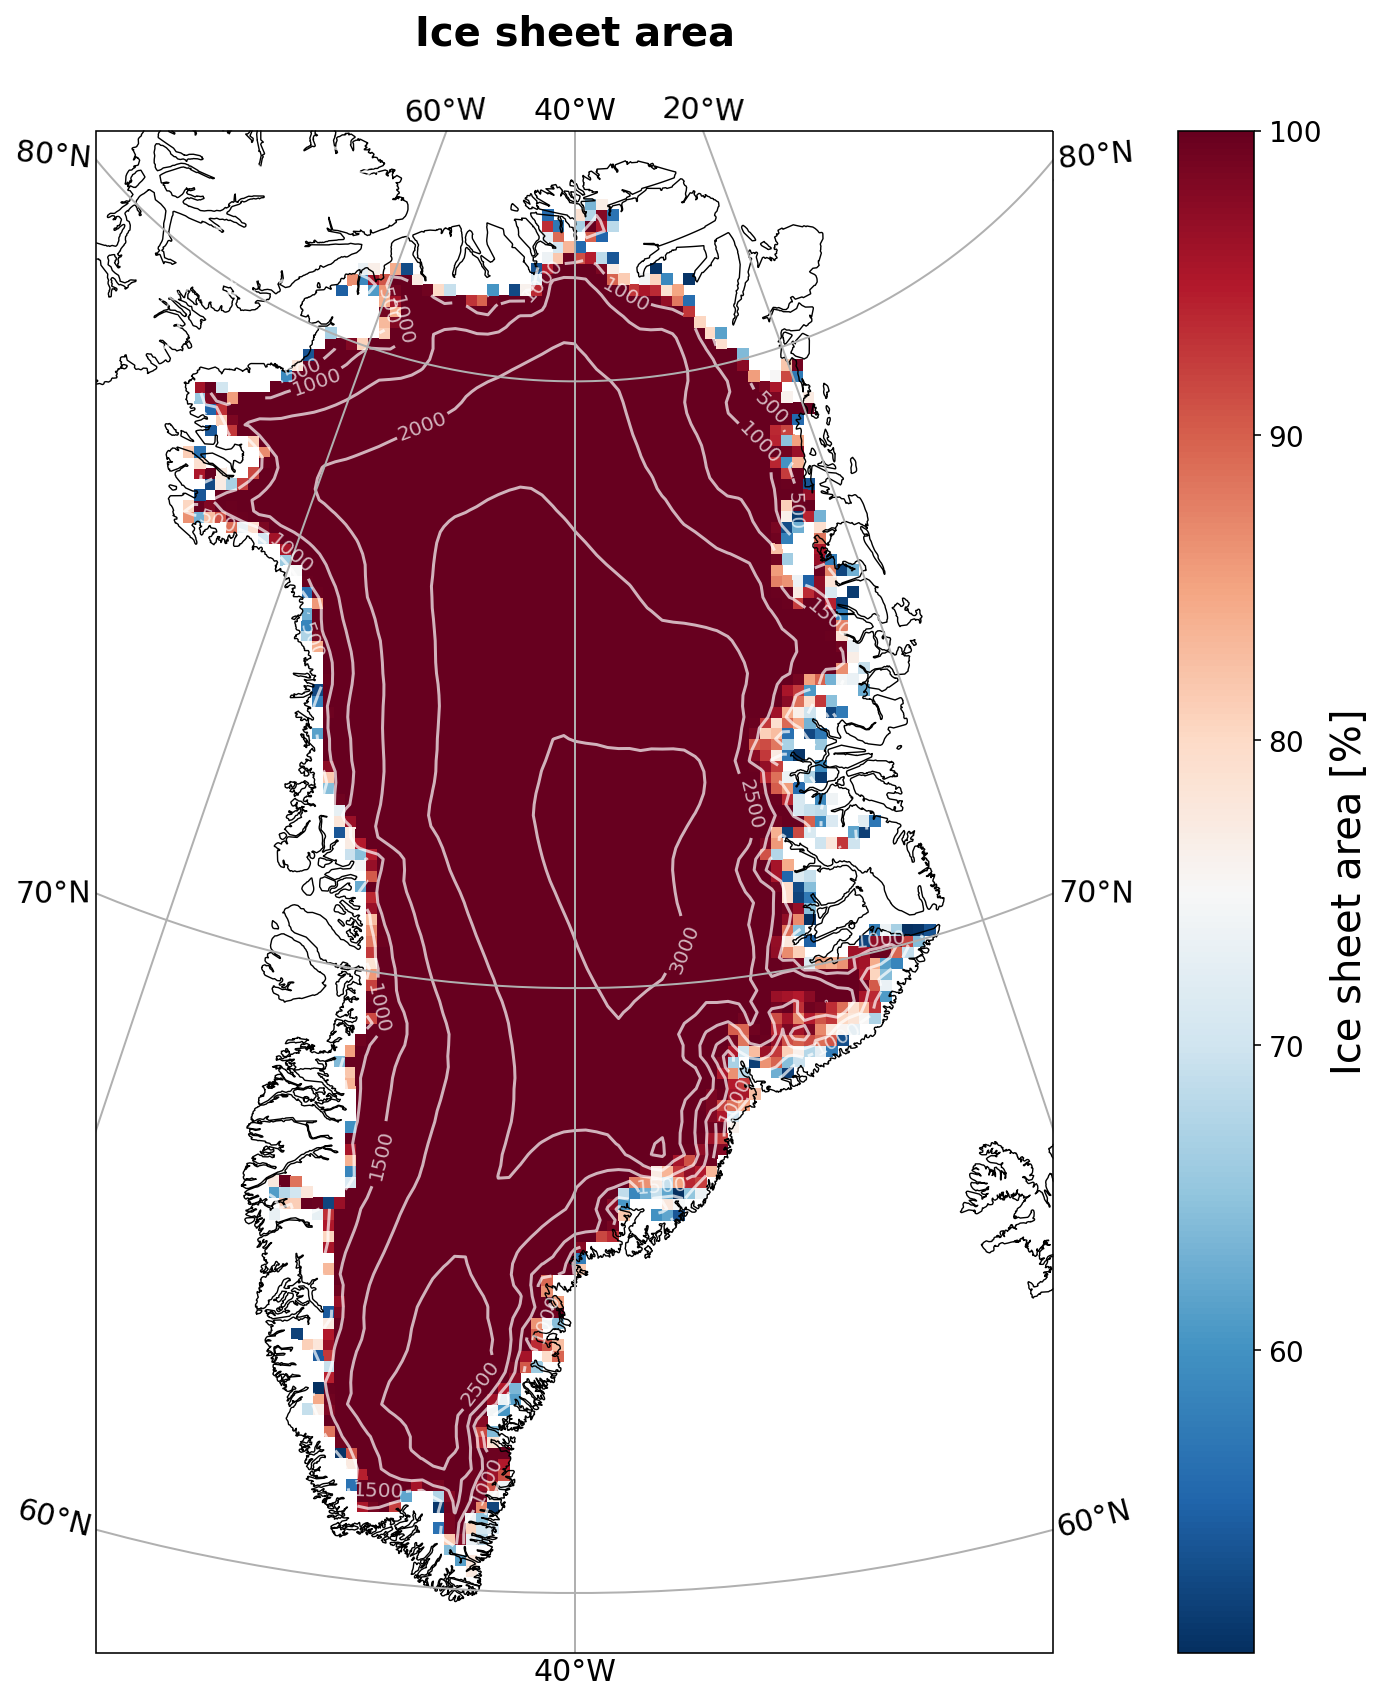

In [11]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, ds_MSK.MSK[0,:,:] * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r')
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Ice sheet area [%]', fontsize=20)
cbar.ax.tick_params(labelsize=14)
cc = ax.contour(lon, lat, ds_MSK.SH[0,:,:], transform=ccrs.PlateCarree(), colors='w', alpha=0.7)
cc.levels = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
fmt = r'%.0f'
ax.clabel(cc, cc.levels, inline=True, fmt=fmt, fontsize=10)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Ice sheet area', weight='bold', fontsize=20, pad=25);

#### The surface mass balance (SMB) is the sum of accumulation and ablation of ice and snow. The GrIS can be divided into two regions, with positive and negative SMB. The negative SMB region is called the ablation zone, the positive SMB region is called the accumulation zone. The dividing line between the ablation and accumulation zone is the equilibrium line altitude (ELA), where the SMB is 0. Bare ice is only present in the ablation zone, as snow needs to melt expose the underlying bare ice. The following cells are use to define daily bare ice extent by using an ELA height threshold and the snowpack height and density variables.

#### Create array with an ELA height threshold. Ablation zone is below 1624m, accumulation zone is above 1624m.

In [12]:
SH = ds_MSK.SH[0,:,:]
SH = np.where(SH > 1624, 0, SH)
SH = np.where(SH != 0, 1, SH)

#### Use the snowpack height variable to include only cells where no snow is present.

In [13]:
SHSN2 = (ds_MSK.SHSN2[:,0,:,:] * GrIS_label)
SHSN2 = np.where(SHSN2 == 0, -1, SHSN2)
SHSN2 = np.where(SHSN2 > -1, 0, SHSN2)
SHSN2 = np.where(SHSN2 == -1, 1, SHSN2)
SHSN2_SH = SHSN2 * SH

#### Use the density variable to include only cells where the density of the top layer of the GrIS is between 920 and 925 kg/m3. This ensures that firn, snow and water are omitted and only ice is included.

In [14]:
RO1 = (ds_MSK.RO1[:,0,:,:] * GrIS_label)
RO1 = np.where(RO1 < 920, 0, RO1)
RO1 = np.where(RO1 > 925, 0, RO1)
RO1 = np.where(RO1 != 0, 1, RO1)
RO1_SH = RO1 * SH

#### Combine both snow pack height and density conditions to create an array <i>s</i> that contains only bare ice cells for the period 2000-2010.

In [15]:
s = SHSN2_SH * RO1_SH

#### Create an array that denotes the time slice for January 1st for every year in 2000-2010.

In [16]:
yearlist = np.array([0,366,731,1096,1461,1827,2192,2557,2922,3288,3653,4018])

#### Determine annual maximum bare ice extent. Annual maximum bare ice extent is defined as those cells that are determined to be bare ice for at least 10 days per year. This threshold ensures that any erroneous detections of supraglacial lakes as bare ice are omitted.

In [17]:
bi = np.zeros((11,ds_MSK.MSK.shape[1], ds_MSK.MSK.shape[2]))
for year in range(11):
    bi[year,:,:] = np.nansum(s[np.arange(yearlist[year],yearlist[year+1]),:,:], axis=0)

bi = np.where(bi < 10, 0, bi)

#### Turn 0's into NaN's

In [18]:
bi_plot = np.where(bi == 0, np.nan, bi)

#### Plot maximum bare ice extent for 2010

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


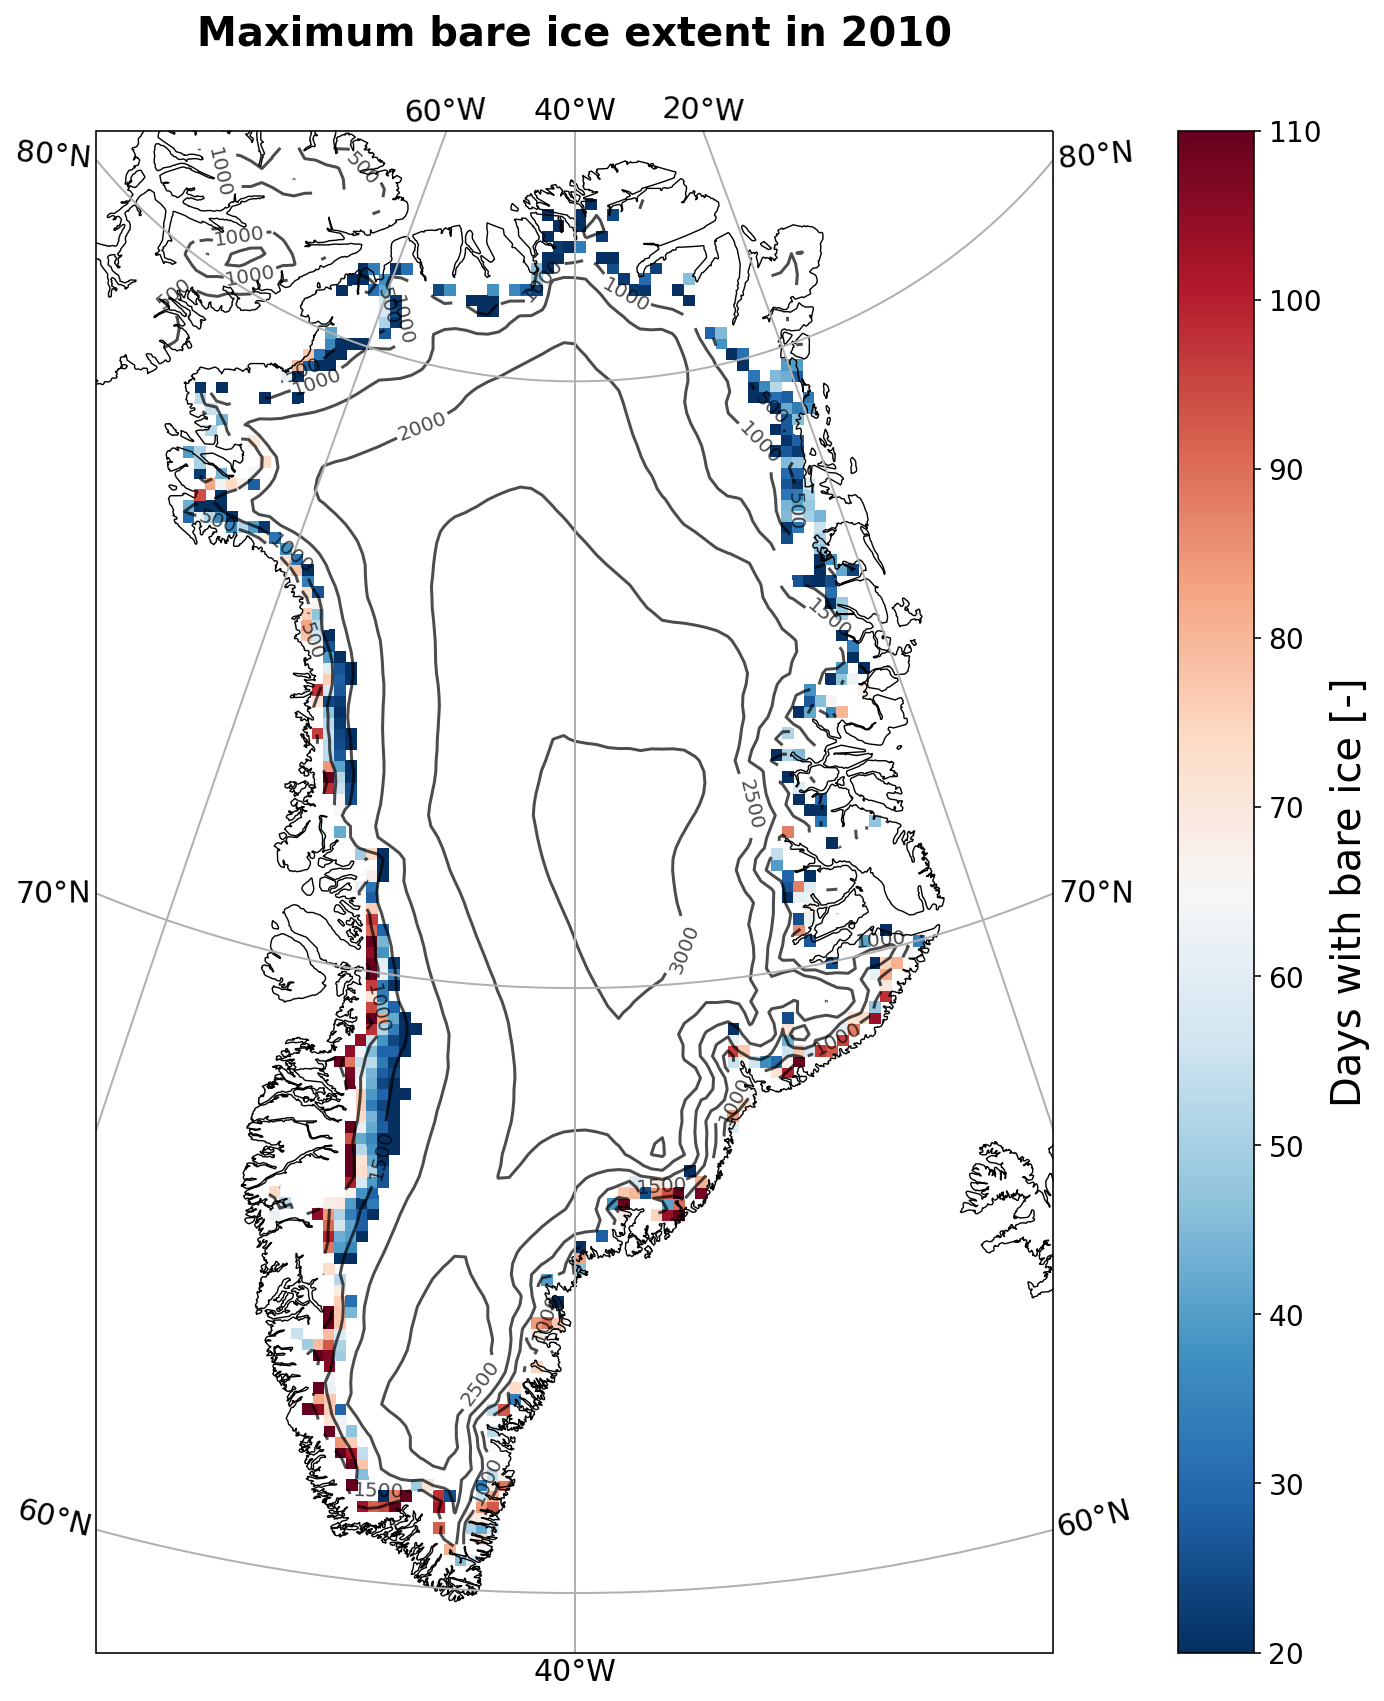

In [25]:
fig = plt.figure(figsize=(14,14))
ax = plt.axes(projection = ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.coastlines(resolution = '10m', linewidth=0.7)
c = ax.pcolor(lon, lat, bi_plot[10,:,:], transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=20, vmax=110)
cbar = fig.colorbar(c, ax=ax, pad = 0.08)
cbar.set_label('Days with bare ice [-]', fontsize=20)
cbar.ax.tick_params(labelsize=14)
cc = ax.contour(lon, lat, ds_MSK.SH[0,:,:], transform=ccrs.PlateCarree(), colors='k', alpha=0.7)
cc.levels = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
fmt = r'%.0f'
ax.clabel(cc, cc.levels, inline=True, fmt=fmt, fontsize=10)

gl = ax.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl.xlocator = mticker.FixedLocator([-60, -40, -20])
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylocator = mticker.FixedLocator([60, 70, 80])
gl.ylabel_style = {'size': 15, 'color': 'black'}
plt.title('Maximum bare ice extent in 2010', weight='bold', fontsize=20, pad=25);

It is clear from this figure that bare ice is exposed along the margins of the GrIS and mostly in the southwest. Most bare ice is exposed for 20-40 days per year. However, some areas show bare ice for more than 100 days per year, especially in the southern regions.

#### Determine maximum bare ice area over 2000-2010. All cells in 2000-2010 during which bare ice has been exposed for more than 10 days per year.

In [21]:
bi_area = np.sum(bi, axis=0)
bi_area = np.where(bi_area > 0, 1, bi_area)
bi_area = np.where(bi_area == 0, np.nan, bi_area)

# Clouds

#### Plot average cloud cover (total, up, middle and down) over the GrIS.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1763: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gour

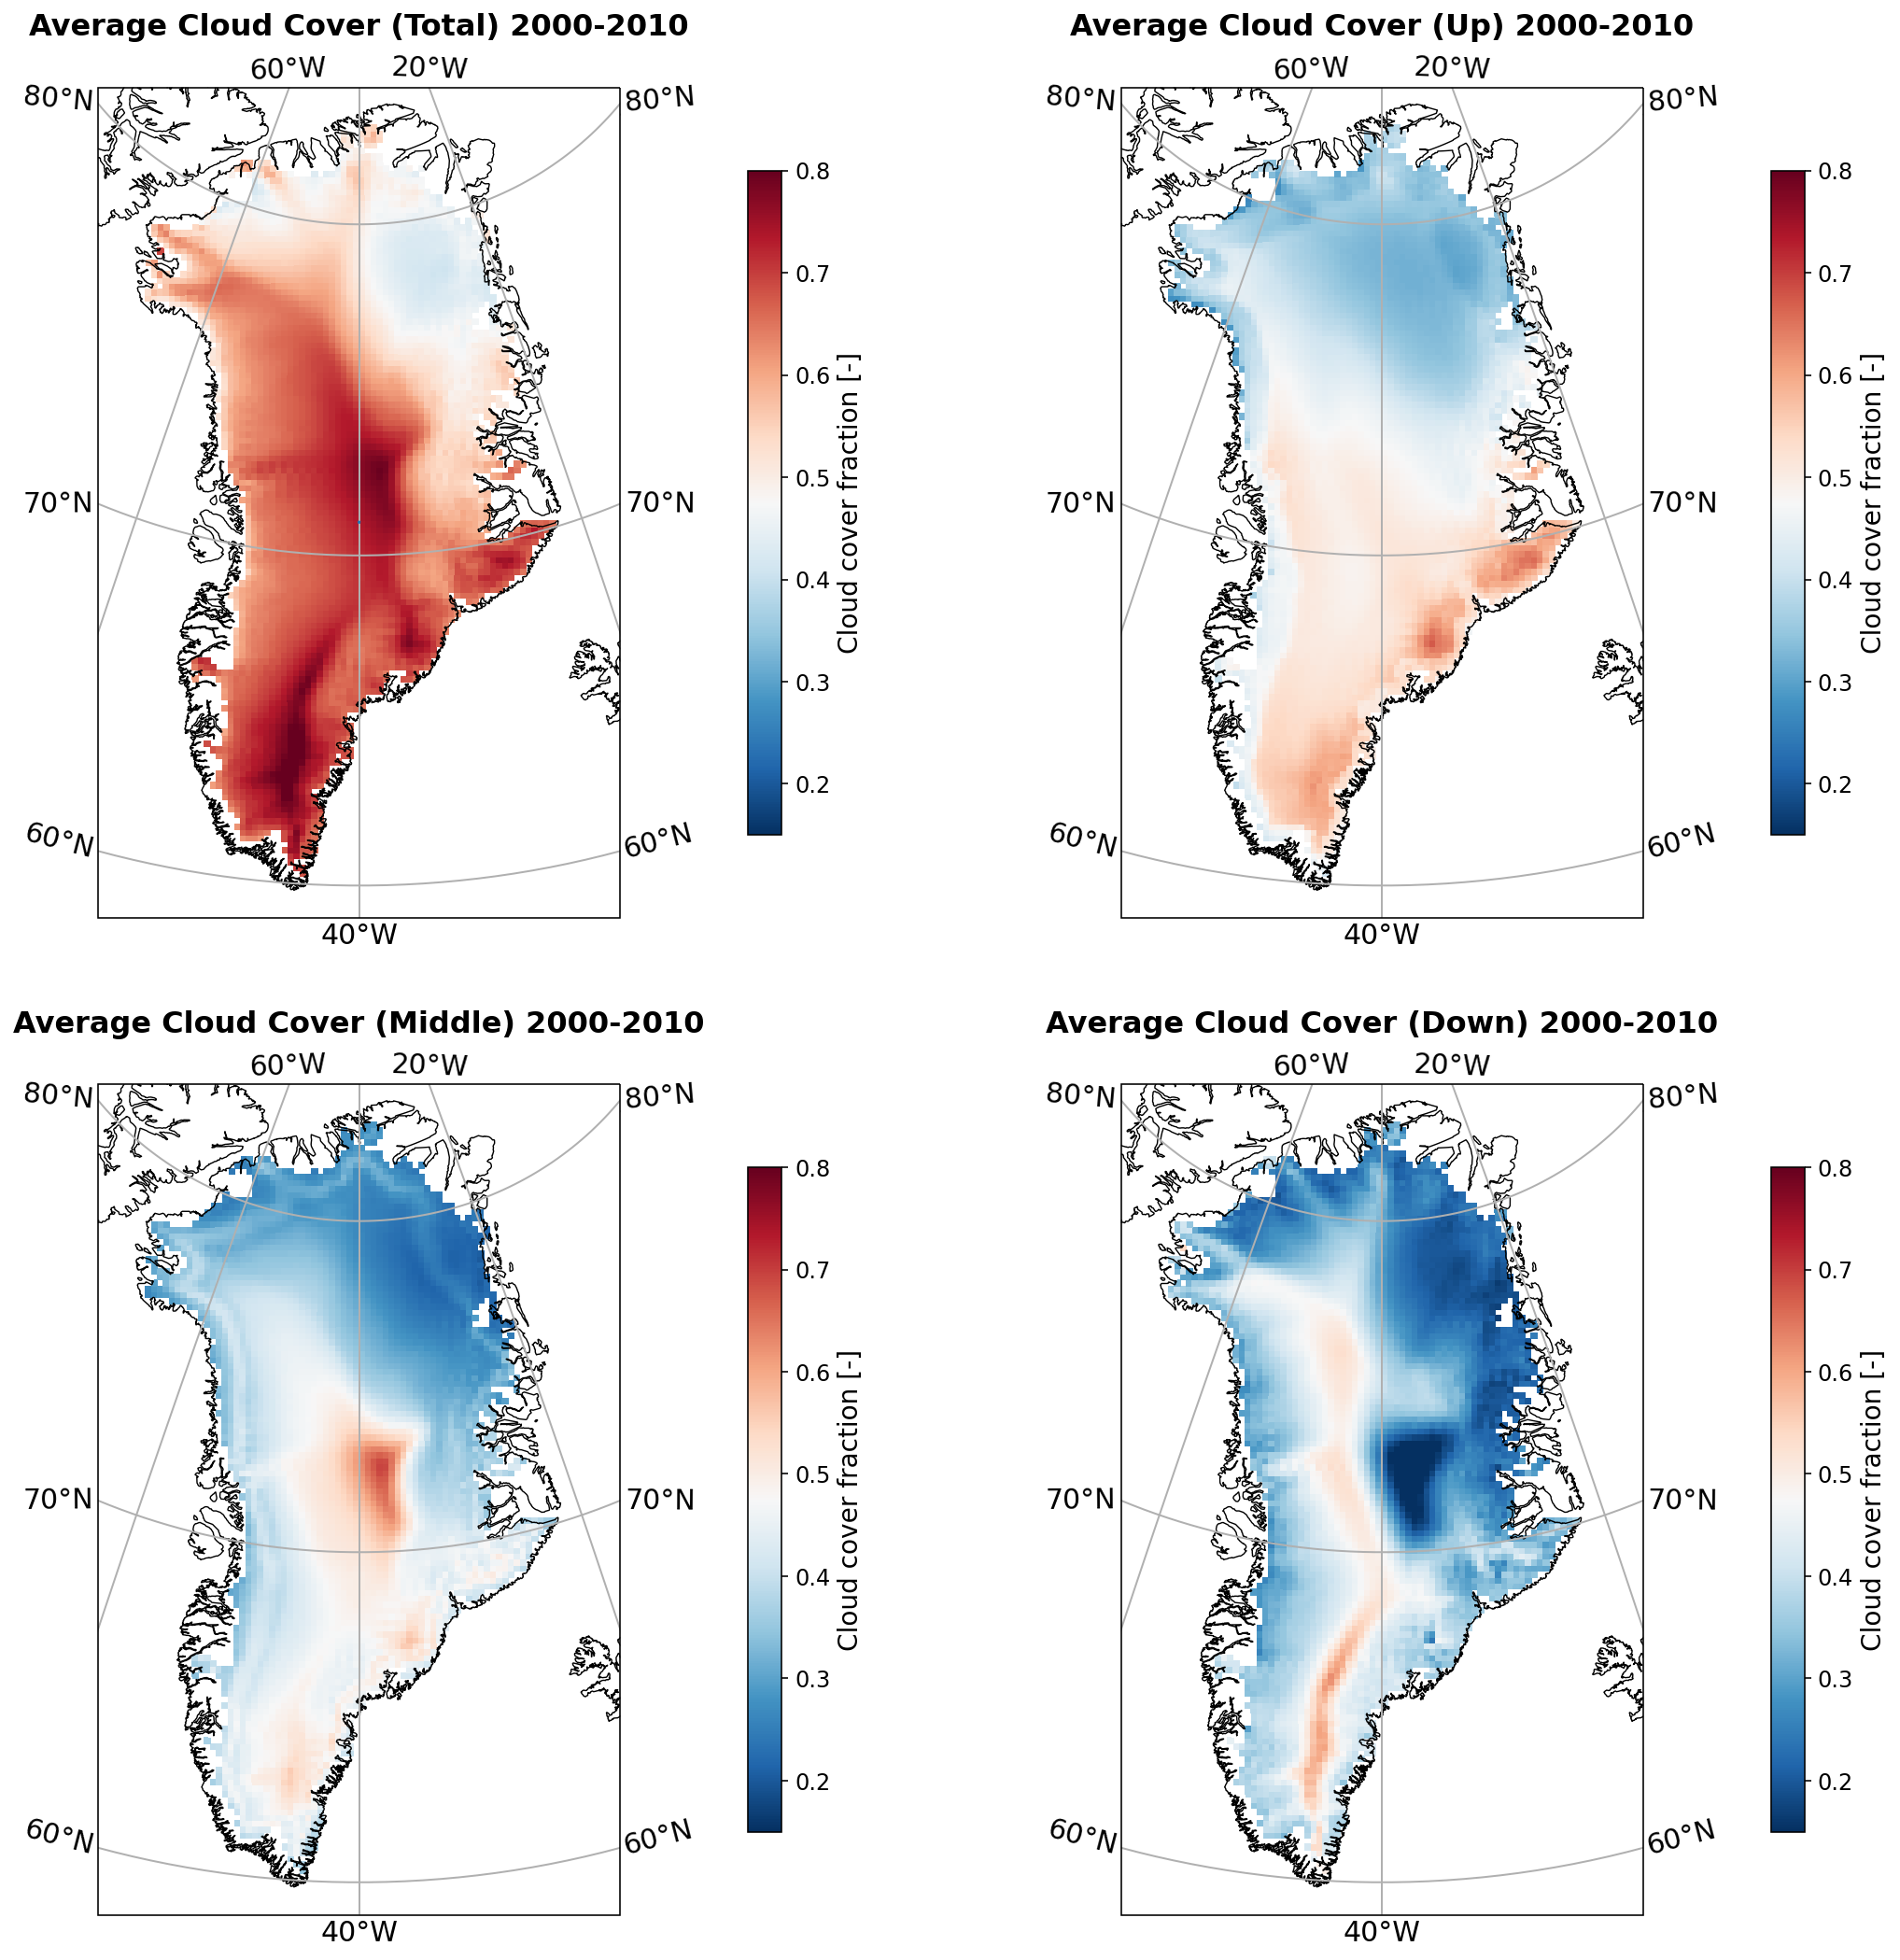

In [26]:
fig = plt.figure(figsize=(18,18))

ax0 = fig.add_subplot(221, projection = ccrs.Orthographic(central_lon, central_lat))
ax0.plot(np.random.rand(10))
ax0.set_extent(extent)
ax0.coastlines(resolution = '10m', linewidth=0.7)
p0 = ax0.pcolor(lon, lat, np.nanmean(ds_MSK.CC, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl0 = ax0.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl0.xlocator = mticker.FixedLocator([-60, -40, -20])
gl0.xlabel_style = {'size': 15, 'color': 'black'}
gl0.ylocator = mticker.FixedLocator([60, 70, 80])
gl0.ylabel_style = {'size': 15, 'color': 'black'}
ax0.set_title('Average Cloud Cover (Total) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar0 = fig.colorbar(p0, ax=ax0, pad = 0.15, shrink=0.8)
cbar0.set_label('Cloud cover fraction [-]', fontsize=14)
cbar0.ax.tick_params(labelsize=12)

ax1 = fig.add_subplot(222, projection = ccrs.Orthographic(central_lon, central_lat))
ax1.set_extent(extent)
ax1.coastlines(resolution = '10m', linewidth=0.7)
p1 = ax1.pcolor(lon, lat, np.nanmean(ds_MSK.CU, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl1 = ax1.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl1.xlocator = mticker.FixedLocator([-60, -40, -20])
gl1.xlabel_style = {'size': 15, 'color': 'black'}
gl1.ylocator = mticker.FixedLocator([60, 70, 80])
gl1.ylabel_style = {'size': 15, 'color': 'black'}
ax1.set_title('Average Cloud Cover (Up) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar1 = fig.colorbar(p1, ax=ax1, pad = 0.15, shrink=0.8)
cbar1.set_label('Cloud cover fraction [-]', fontsize=14)
cbar1.ax.tick_params(labelsize=12)

ax2 = fig.add_subplot(223, projection = ccrs.Orthographic(central_lon, central_lat))
ax2.set_extent(extent)
ax2.coastlines(resolution = '10m', linewidth=0.7)
p2 = ax2.pcolor(lon, lat, np.nanmean(ds_MSK.CM, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl2 = ax2.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl2.xlocator = mticker.FixedLocator([-60, -40, -20])
gl2.xlabel_style = {'size': 15, 'color': 'black'}
gl2.ylocator = mticker.FixedLocator([60, 70, 80])
gl2.ylabel_style = {'size': 15, 'color': 'black'}
ax2.set_title('Average Cloud Cover (Middle) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar2 = fig.colorbar(p2, ax=ax2, pad = 0.15, shrink=0.8)
cbar2.set_label('Cloud cover fraction [-]', fontsize=14)
cbar2.ax.tick_params(labelsize=12)

ax3 = fig.add_subplot(224, projection = ccrs.Orthographic(central_lon, central_lat))
ax3.set_extent(extent)
ax3.coastlines(resolution = '10m', linewidth=0.7)
p3 = ax3.pcolor(lon, lat, np.nanmean(ds_MSK.CD, axis=0) * GrIS_label, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=0.15, vmax=0.8)
gl3 = ax3.gridlines(draw_labels=True, linewidth=1, alpha=1)
gl3.xlocator = mticker.FixedLocator([-60, -40, -20])
gl3.xlabel_style = {'size': 15, 'color': 'black'}
gl3.ylocator = mticker.FixedLocator([60, 70, 80])
gl3.ylabel_style = {'size': 15, 'color': 'black'}
ax3.set_title('Average Cloud Cover (Down) 2000-2010', weight='bold', fontsize=16, pad=10);
cbar3 = fig.colorbar(p3, ax=ax3, pad = 0.15, shrink=0.8)
cbar3.set_label('Cloud cover fraction [-]', fontsize=14)
cbar3.ax.tick_params(labelsize=12)

This figure shows that most cloud cover occurs over the southern GrIS. This holds for cloud at high, middle and low altitudes.

# Annual means

#### Determine annual mean of cloud cover (total, up, middle and down) over the GrIS.

In [27]:
ds_CC_am = (ds_MSK.CC * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CU_am = (ds_MSK.CU * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CM_am = (ds_MSK.CM * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CD_am = (ds_MSK.CD * GrIS_label).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])

#### Determine annual mean of cloud cover (total, up, middle and down) over the bare ice extent.

In [28]:
ds_CC_ambi = (ds_MSK.CC * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CU_ambi = (ds_MSK.CU * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CM_ambi = (ds_MSK.CM * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])
ds_CD_ambi = (ds_MSK.CD * GrIS_label * bi_area).groupby('TIME.year').mean(dim=['TIME','Y21_155', 'X12_84'])

#### Determine annual maximum bare ice extent per year

In [30]:
bi_area_y = np.where(bi > 0, 1, bi_plot)
bi_area_y = np.where(bi_area_y == 0, np.nan, bi_area_y)
bi_am = np.nansum(np.nansum(bi_area_y, axis=1)* 20**2, axis=1)

#### Plot annual means of cloud cover (total, up, middle and down) over the GrIS and over the bare ice extent. Also plot annual maximum bare ice extent

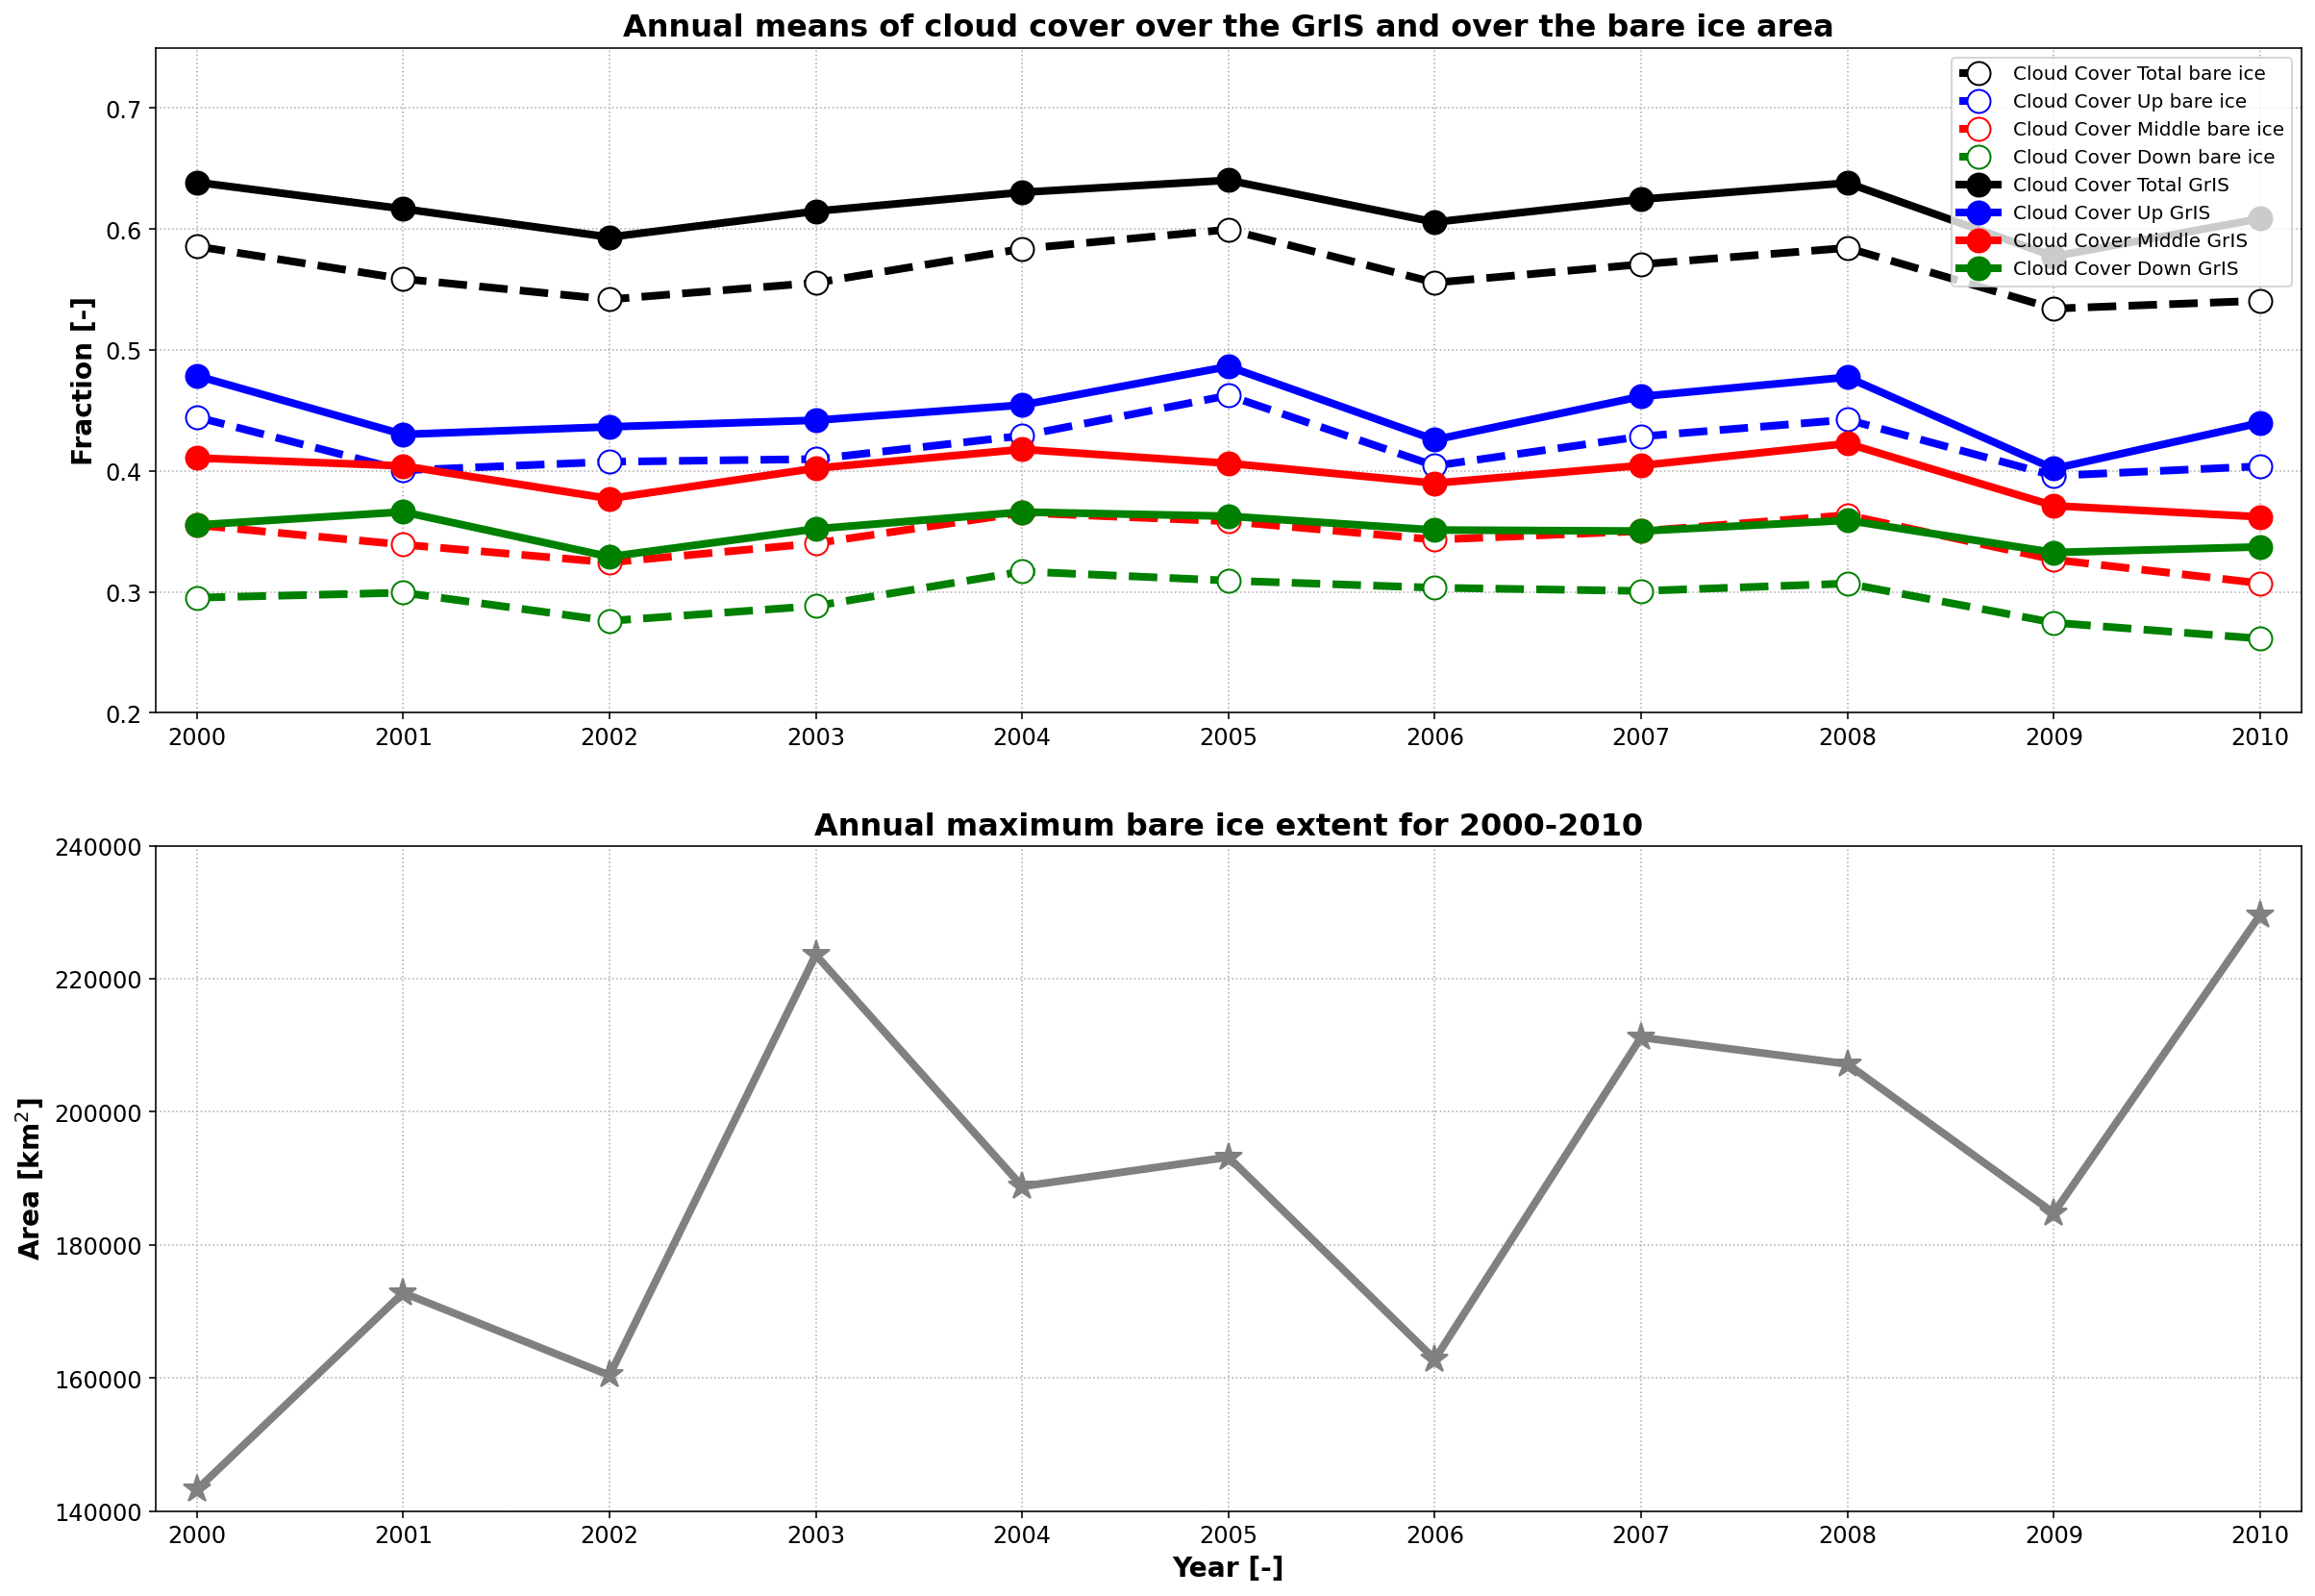

In [31]:
fig = plt.figure(figsize=(20,14))

ax0 = fig.add_subplot(211)

ax0.plot(np.arange(2000,2011), ds_CC_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='black', linewidth=4, label='Cloud Cover Total bare ice')
ax0.plot(np.arange(2000,2011), ds_CU_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='blue', linewidth=4, label='Cloud Cover Up bare ice')
ax0.plot(np.arange(2000,2011), ds_CM_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='red', linewidth=4, label='Cloud Cover Middle bare ice')
ax0.plot(np.arange(2000,2011), ds_CD_ambi, marker='o', linestyle='--', markerfacecolor='white', markersize=12, color='green', linewidth=4, label='Cloud Cover Down bare ice')
ax0.plot(np.arange(2000,2011), ds_CC_am, marker='o', markerfacecolor='black', markersize=12, color='black', linewidth=4, label='Cloud Cover Total GrIS')
ax0.plot(np.arange(2000,2011), ds_CU_am, marker='o', markerfacecolor='blue', markersize=12, color='blue', linewidth=4, label='Cloud Cover Up GrIS')
ax0.plot(np.arange(2000,2011), ds_CM_am, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4, label='Cloud Cover Middle GrIS')
ax0.plot(np.arange(2000,2011), ds_CD_am, marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4, label='Cloud Cover Down GrIS')
ax0.set_xlim([1999.8, 2010.2])
ax0.set_ylim([0.2, 0.75])
ax0.set_xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
ax0.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], fontsize=12)
ax0.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax0.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7'], fontsize=12)
ax0.set_ylabel('Fraction [-]', weight='bold', fontsize=14)
ax0.legend(loc='upper right')
ax0.set_title('Annual means of cloud cover over the GrIS and over the bare ice area', weight='bold', fontsize=16)
ax0.grid(linestyle=':')

ax1 = fig.add_subplot(212)

ax1.plot(np.arange(2000,2011), bi_am, marker='*', markerfacecolor='grey', markersize=15, color='grey', linewidth=4, label='Bare ice extent')
ax1.set_xlim([1999.8, 2010.2])
ax1.set_ylim([1.4e5, 2.4e5])
ax1.set_xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])
ax1.set_xticklabels(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'], fontsize=12)
ax1.set_yticks([14e4, 16e4, 18e4, 20e4, 22e4, 24e4])
ax1.set_yticklabels(['140000', '160000', '180000', '200000', '220000', '240000'], fontsize=12)
ax1.set_xlabel('Year [-]', weight='bold', fontsize=14)
ax1.set_ylabel('Area [km$^2$]', weight='bold', fontsize=14)
ax1.set_title('Annual maximum bare ice extent for 2000-2010', weight='bold', fontsize=16)
ax1.grid(linestyle=':')

The top panel of this figure shows that cloud cover is less over the bare ice extent than over the entire GrIS, for high, middle and low altitudes. In general, more high altitude clouds are present. The lower panel shows the high annual variability in maximum bare ice extent.

# Daily means

#### Determine daily cloud cover over GrIS and over bare ice area, averaged over all years.

In [32]:
ds_CC_sm = (ds_MSK.CC * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CU_sm = (ds_MSK.CU * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CM_sm = (ds_MSK.CM * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CD_sm = (ds_MSK.CD * GrIS_label).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()

ds_CC_smbi = (ds_MSK.CC * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CU_smbi = (ds_MSK.CU * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CM_smbi = (ds_MSK.CM * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()
ds_CD_smbi = (ds_MSK.CD * GrIS_label * bi_area).groupby('TIME.dayofyear').mean(dim=['TIME','Y21_155', 'X12_84']).rolling(dayofyear=3, center=True).mean()

#### Determine daily bare ice extent, averaged over all years

In [33]:
bi_day = np.zeros((366,1))
leapyearstartdays = np.array([0,1461,2922])

# First 60 days are the same for each year
for i in np.arange(0,59):
    bi_day[i,0] = np.nanmean(np.nansum(np.nansum(s[yearlist[:-1] + i, :,:], axis=1), axis=1))
    
# February 29th for the leap years
bi_day[59,0] = np.nanmean(np.nansum(np.nansum(s[leapyearstartdays + i, :,:], axis=1), axis=1))

# March-December for the non-leap years
for i in np.arange(59,365):
    bi_day[i+1,0] = np.nanmean(np.nansum(np.nansum(s[yearlist[[1,2,3,5,6,7,9,10]] + i, :,:], axis=1), axis=1))

# # March-December for the leap years
for i in np.arange(60,366):
    bi_day[i,0] = ((bi_day[i,0] * 8) + (np.nanmean(np.nansum(np.nansum(s[leapyearstartdays + i, :,:], axis=1), axis=1)) * 3)) / 11

bi_day_km2 = bi_day * 20**2

#### Plot daily cloud cover (total, up, middle and down) over the GrIS and over the bare ice extent, averaged over all years. Also plot daily bare ice extent, averaged over all years

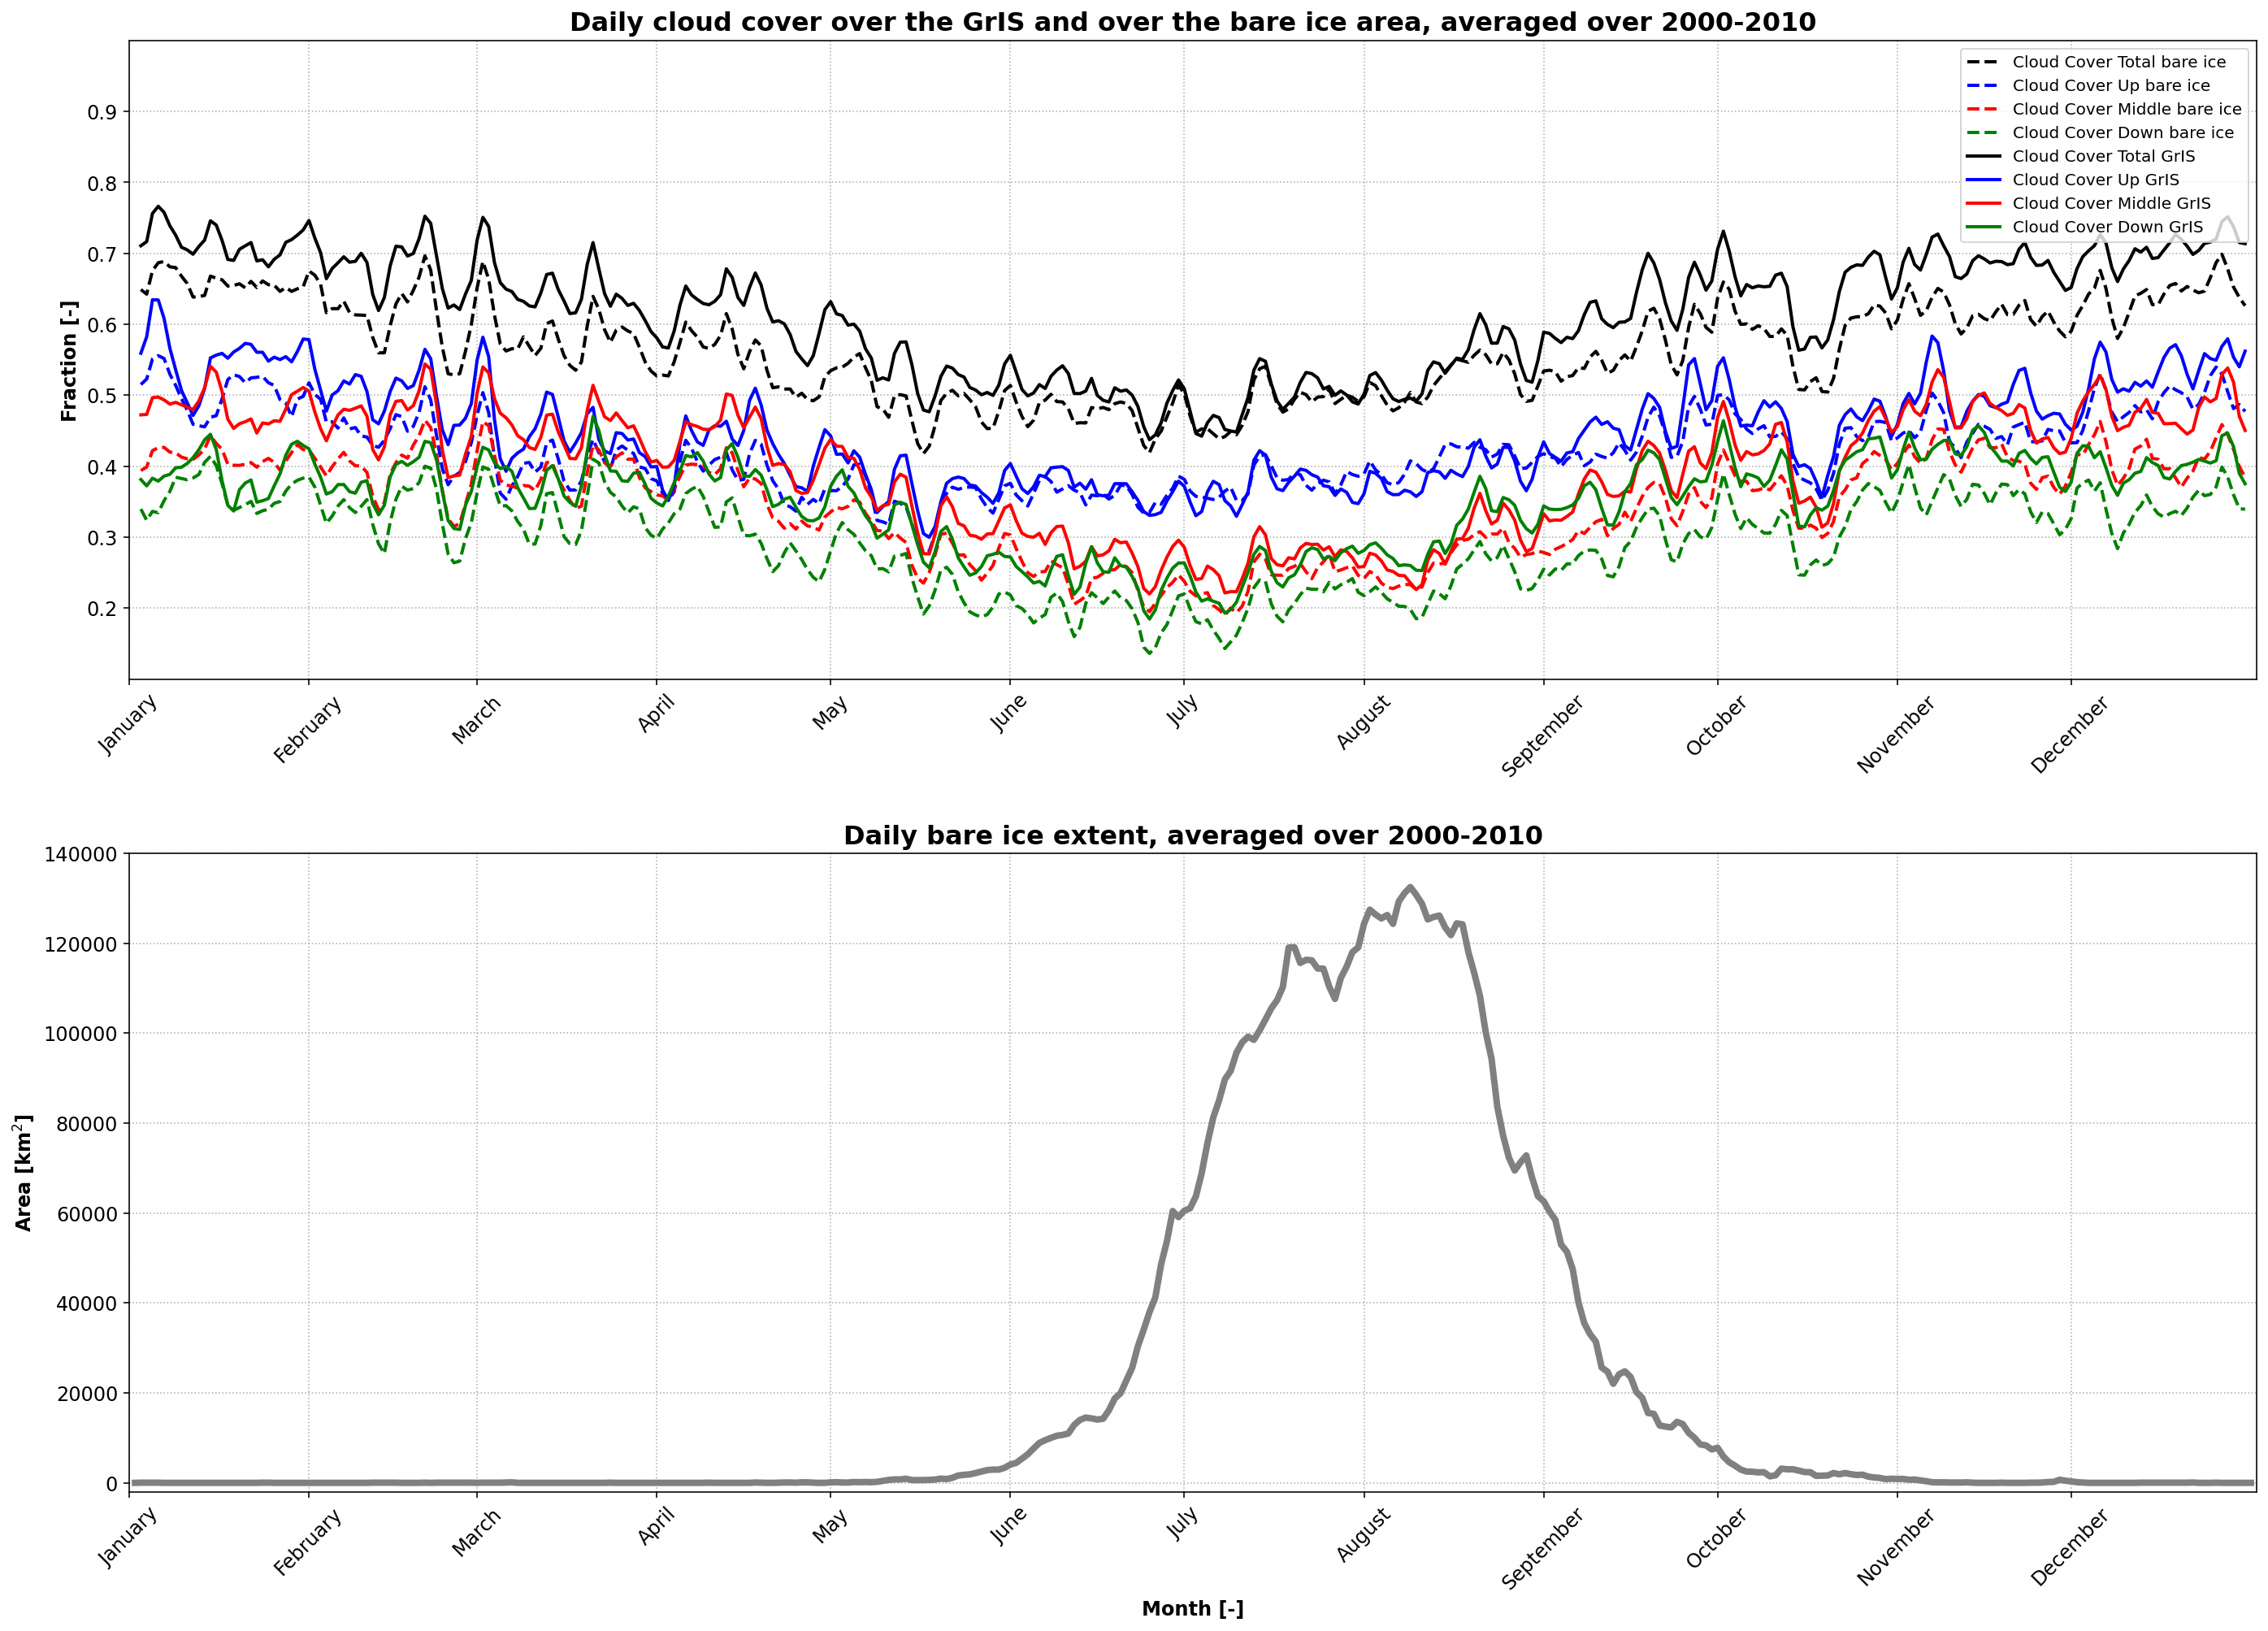

In [34]:
fig = plt.figure(figsize=(20,14))

ax0 = fig.add_subplot(211)

ax0.plot(np.arange(1,367), ds_CC_smbi, color='black', linestyle='--', linewidth=2, label='Cloud Cover Total bare ice')
ax0.plot(np.arange(1,367), ds_CU_smbi, color='blue', linestyle='--', linewidth=2, label='Cloud Cover Up bare ice')
ax0.plot(np.arange(1,367), ds_CM_smbi, color='red', linestyle='--', linewidth=2, label='Cloud Cover Middle bare ice')
ax0.plot(np.arange(1,367), ds_CD_smbi, color='green', linestyle='--', linewidth=2, label='Cloud Cover Down bare ice')
ax0.plot(np.arange(1,367), ds_CC_sm, color='black', linewidth=2, label='Cloud Cover Total GrIS')
ax0.plot(np.arange(1,367), ds_CU_sm, color='blue', linewidth=2, label='Cloud Cover Up GrIS')
ax0.plot(np.arange(1,367), ds_CM_sm, color='red', linewidth=2, label='Cloud Cover Middle GrIS')
ax0.plot(np.arange(1,367), ds_CD_sm, color='green', linewidth=2, label='Cloud Cover Down GrIS')
ax0.set_xlim([0, 367])
ax0.set_ylim([0.1, 1.0])
ax0.set_xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335])
ax0.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, fontsize=12)
ax0.set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
ax0.set_yticklabels(['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'], fontsize=12)
ax0.set_ylabel('Fraction [-]', weight='bold', fontsize=12)
ax0.legend(loc='upper right')
ax0.set_title('Daily cloud cover over the GrIS and over the bare ice area, averaged over 2000-2010', weight='bold', fontsize=16)
ax0.grid(linestyle=':')

ax1 = fig.add_subplot(212)
fig.tight_layout(pad=4)

ax1.plot(np.arange(1,367), bi_day_km2, color='grey', linewidth=4, label='Bare ice extent')
ax1.set_xlim([0, 367])
ax1.set_ylim([-2e3, 14e4])
ax1.set_xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335])
ax1.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, fontsize=12)
ax1.set_yticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4])
ax1.set_yticklabels(['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000'], fontsize=12)
ax1.set_xlabel('Month [-]', weight='bold', fontsize=12)
ax1.set_ylabel('Area [km$^2$]', weight='bold', fontsize=12)
ax1.set_title('Daily bare ice extent, averaged over 2000-2010', weight='bold', fontsize=16)
ax1.grid(linestyle=':')

The top panel of this figure shows that, during the entire year, less daily cloud cover is present over the bare ice extent than over the entire GrIS, similarly to the annual means. Again, clouds at high altitudes are more abundant, especially in June, July and August. The lower panel shows that little to no bare ice is present from October through May. Early August shows a peak in bare ice extent.

# Linear regression

#### Calculate linear regression between daily bare ice extent and total cloud cover over GrIS and total cloud cover over bare ice extent. Only include June, July, August and September. There is almost no bare ice in the other months

#### Initialize linear regression models.

In [35]:
model_GrIS = LinearRegression().fit(bi_day_km2[152:305], ds_CC_sm[152:305])
model_bi = LinearRegression().fit(bi_day_km2[152:305], ds_CC_smbi[152:305])

#### Calculate R$^2$-values.

In [37]:
r_sq_GrIS = model_GrIS.score(bi_day_km2[152:305], ds_CC_sm[152:305])
r_sq_bi = model_bi.score(bi_day_km2[152:305], ds_CC_smbi[152:305])

#### Calculate linear fits

In [38]:
y_pred_GrIS = model_GrIS.predict(bi_day_km2[152:305])
y_pred_bi = model_bi.predict(bi_day_km2[152:305])

#### Create colors

In [40]:
col_dums_GrIS = np.sort(ds_CC_sm[152:305] - y_pred_GrIS)
col_column_GrIS = col_dums_GrIS - np.min(col_dums_GrIS)
my_colors_GrIS = np.array([0.5, (1/(np.max(col_dums_GrIS) - np.min(col_dums_GrIS))), (1/(np.max(col_dums_GrIS) - np.min(col_dums_GrIS)))/2]) * np.transpose(np.array([col_column_GrIS,]))

col_dums_bi = np.sort(ds_CC_smbi[152:305] - y_pred_bi)
col_column_bi = col_dums_bi - np.min(col_dums_bi)
my_colors_bi = np.array([0.5, (1/(np.max(col_dums_bi) - np.min(col_dums_bi))), (1/(np.max(col_dums_bi) - np.min(col_dums_bi)))/2]) * np.transpose(np.array([col_column_bi,]))

#### Plot linear regressions of bare ice extent with cloud cover fraction over GrIS and cloud cover fraction over the bare ice extent for each day in June, July, August and September, averaged over 2000-2010. Lighter colors indicate days earlier in the season, so closer to June. Darker colors indicate days later in the season, so closer to September

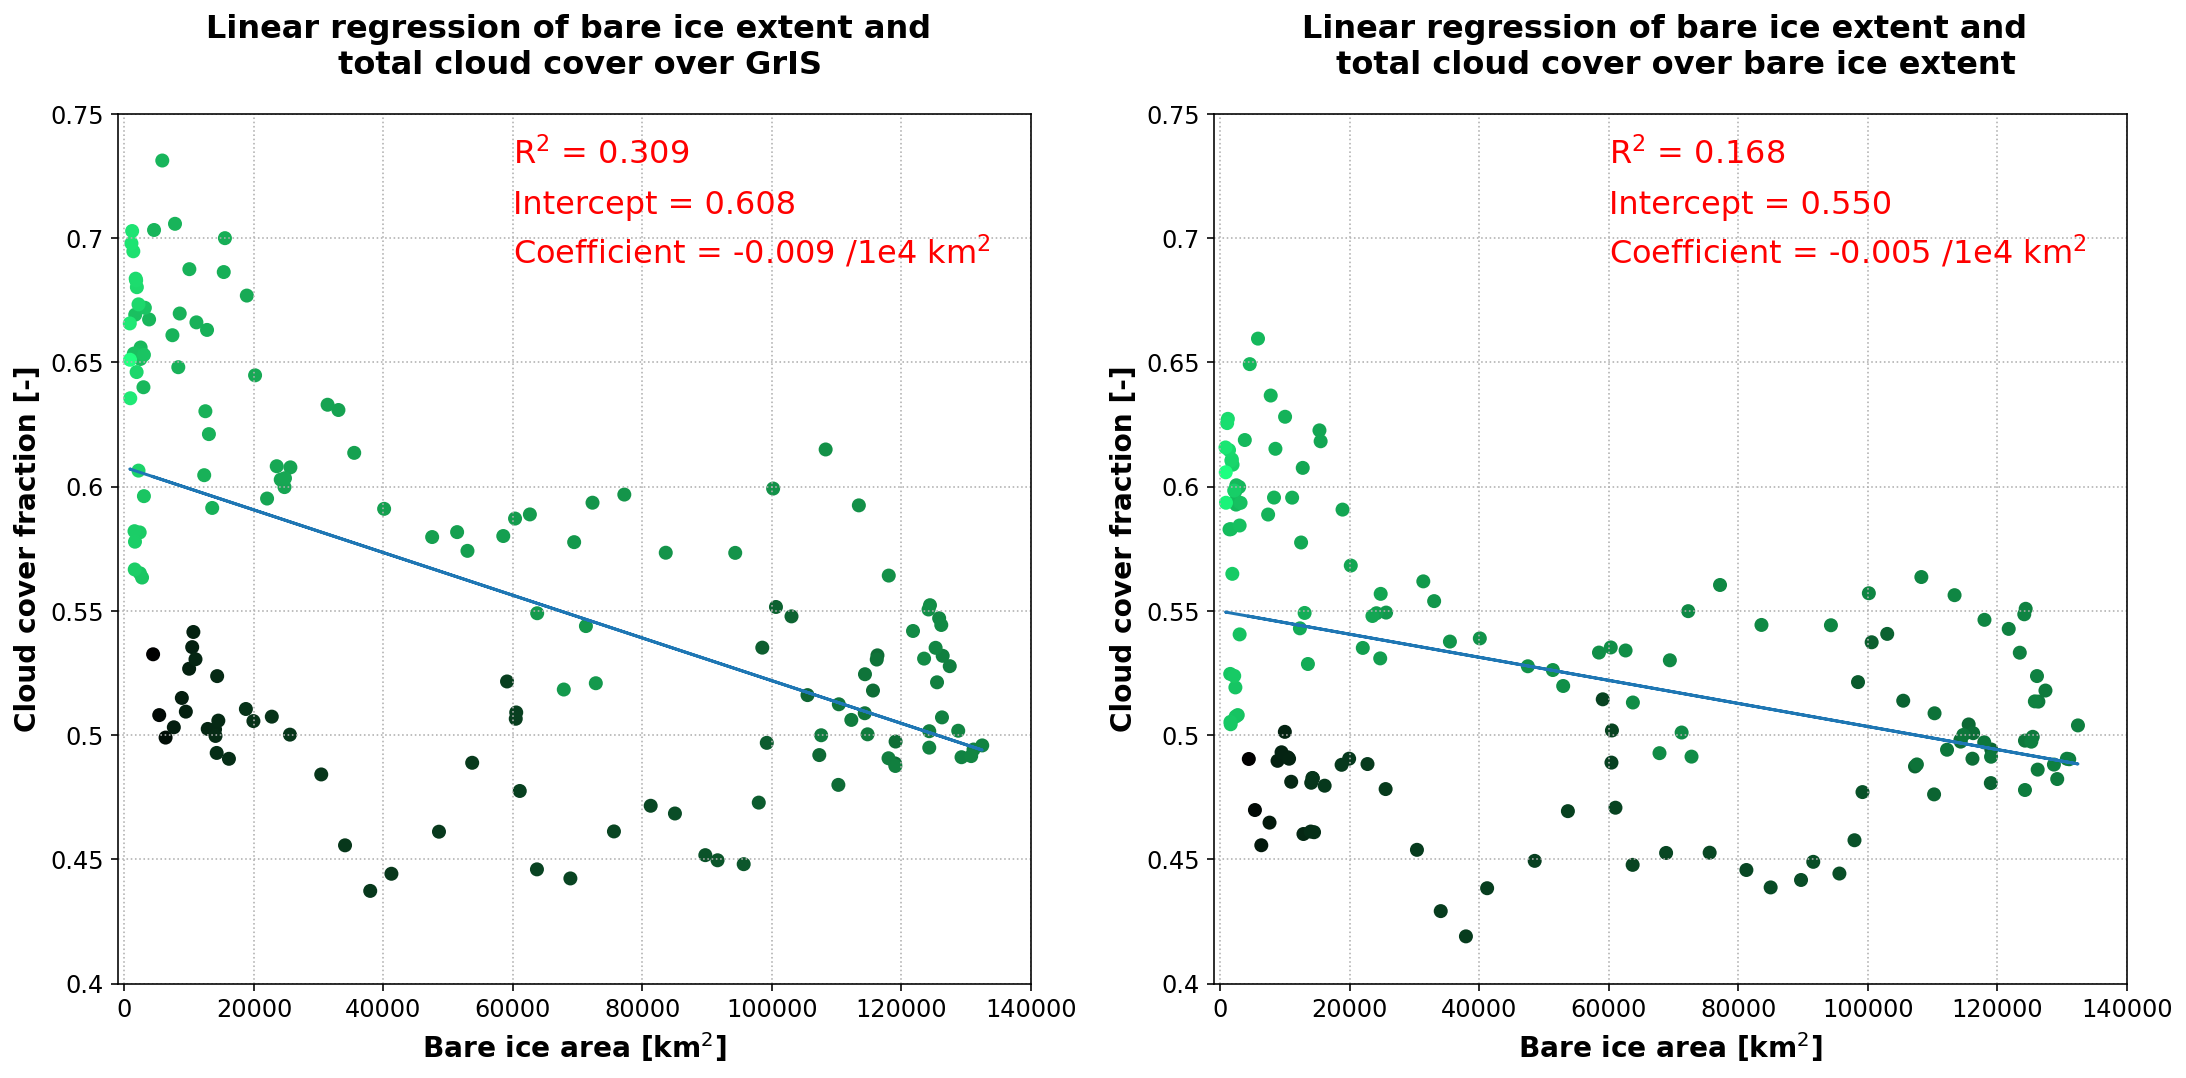

In [41]:
fig = plt.figure(figsize=(18,8))

ax0 = fig.add_subplot(121)

ax0.scatter(bi_day_km2[152:305], ds_CC_sm[152:305],  c=my_colors_GrIS)
ax0.plot(bi_day_km2[152:305], y_pred_GrIS)
ax0.text(60000, 0.73, 'R$^2$ = %.3f' % (r_sq_GrIS), fontsize=16, color='red')
ax0.text(60000, 0.71, 'Intercept = %.3f' % (model_GrIS.intercept_), fontsize=16, color='red')
ax0.text(60000, 0.69, 'Coefficient = %.3f /1e4 km$^2$' % (model_GrIS.coef_ * 10000), fontsize=16, color='red')

ax0.set_xlim([-1000, 140000])
ax0.set_ylim([0.4, 0.75])
ax0.set_xticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4])
ax0.set_xticklabels(['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000'], fontsize=12)
ax0.set_yticks([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
ax0.set_yticklabels(['0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75'], fontsize=12)
ax0.set_xlabel('Bare ice area [km$^2$]', weight='bold', fontsize=14)
ax0.set_ylabel('Cloud cover fraction [-]', weight='bold', fontsize=14)
ax0.set_title('Linear regression of bare ice extent and \n total cloud cover over GrIS', weight='bold', fontsize=16, pad=20)
ax0.grid(linestyle=':')

ax1 = fig.add_subplot(122)

ax1.scatter(bi_day_km2[152:305], ds_CC_smbi[152:305],  c=my_colors_bi)
ax1.plot(bi_day_km2[152:305], y_pred_bi)
ax1.text(60000, 0.73, 'R$^2$ = %.3f' % (r_sq_bi), fontsize=16, color='red')
ax1.text(60000, 0.71, 'Intercept = %.3f' % (model_bi.intercept_), fontsize=16, color='red')
ax1.text(60000, 0.69, 'Coefficient = %.3f /1e4 km$^2$' % (model_bi.coef_ * 10000), fontsize=16, color='red')

ax1.set_xlim([-1000, 140000])
ax1.set_ylim([0.4, 0.75])
ax1.set_xticks([0, 2e4, 4e4, 6e4, 8e4, 10e4, 12e4, 14e4])
ax1.set_xticklabels(['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000'], fontsize=12)
ax1.set_yticks([0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75])
ax1.set_yticklabels(['0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75'], fontsize=12)
ax1.set_xlabel('Bare ice area [km$^2$]', weight='bold', fontsize=14)
ax1.set_ylabel('Cloud cover fraction [-]', weight='bold', fontsize=14)
ax1.set_title('Linear regression of bare ice extent and \n total cloud cover over bare ice extent', weight='bold', fontsize=16, pad=20)
ax1.grid(linestyle=':')

The linear regression figures show the correlation between bare ice extent and cloud cover, over the entire GrIS (left) and over the bare ice extent (right). No significant correlation are found with R$^2$ values of 0.309 and 0.168. The pattern from lighter colors (days closer to June) to darker colors (days to September) shows a shift in correlation between bare ice extent and cloud cover over time.